### Data Creation

Create data for each state in a dictionary based on their voter registration deadlines and zip each list with another based 
on their 2020 election results. Looking at relation of red vs blue states and voter registration deadlines

In [1]:
states_28_30 = "Alaska, Arizona, Arkansas, Florida, Georgia, Indiana, Kentucky, Louisiana, Mississippi, New Mexico, Ohio, Rhode Island, South Carolina, Tennessee, Texas "
states_28_30 = states_28_30.split(",")
states_28_30 = [i.strip() for i in states_28_30]

states_20_27 = "Delaware, Kansas, Missouri, New Jersey, New York, North Carolina, Oklahoma, Oregon, Virginia, West Virginia"
states_20_27 = states_20_27.split(", ")

states_1_15 = "Alabama, Massachusetts, Montana, Nebraska, Pennsylvania, South Dakota"
states_1_15 = states_1_15.split(", ")

states_0 = "California, Colorado, Connecticut, District of Columbia, Hawaii, Idaho, Illinois, Iowa, Maine, Maryland, Michigan, Minnesota, Nevada, New Hampshire, Utah, Vermont, Washington, Wisconsin, Wyoming"
states_0 = states_0.split(", ")

states_none = ['North Dakota']

In [2]:
states_28_30_vote = ['R', 'D', 'R', 'R', 'D', 'R', 'R', 'R', 'R', 'D', 'R', 'D', 'R', 'R', 'R']
states_20_27_vote = ['D', 'R', 'R', 'D', 'D', 'R', "R", 'D', 'D', 'R']
states_1_15_vote = ['R', 'D', 'R', 'R', 'D', 'R']
states_0_vote = ['D', 'D', 'D', 'D', 'D', 'R', 'D', 'D', 'R', 'D', 'D', 'D', 'D', 'D', 'R', 'D', 'D', 'D', 'R']
states_none_vote = ['R']

dict_28_30 =dict(zip(states_28_30, states_28_30_vote))
dict_20_27 =dict(zip(states_20_27, states_20_27_vote))
dict_1_15 =dict(zip(states_1_15, states_1_15_vote))
dict_0 =dict(zip(states_0, states_0_vote))
dict_none =dict(zip(states_none, states_none_vote))

In [3]:
def count_states(dictionary):
    r = 0
    d = 0
    for k,v in dictionary.items():
        if v == 'R':
            r+=1
        elif v == 'D':
            d+=1
    return (r,d)

In [4]:
count_28_30 = count_states(dict_28_30)
count_20_27 = count_states(dict_20_27)
count_1_15 = count_states(dict_1_15)
count_0 = count_states(dict_0)
count_none = count_states(dict_none)

In [5]:
print("States with registration deadlines 28-30 days prior to election:")
print(f'    Red: {count_28_30[0]}, Blue:{count_28_30[1]}')
print("States with registration deadlines 20-27 days prior to election:")
print(f'    Red: {count_20_27[0]}, Blue:{count_28_30[1]}')
print("States with registration deadlines 1-15 days prior to election:")
print(f'    Red: {count_1_15[0]}, Blue:{count_1_15[1]}')
print("States with registration deadlines 0 days prior to election:")
print(f'    Red: {count_0[0]}, Blue:{count_0[1]}')
print("States with no voter registration")
print(f'    Red: {count_none[0]}, Blue:{count_none[1]}')

States with registration deadlines 28-30 days prior to election:
    Red: 11, Blue:4
States with registration deadlines 20-27 days prior to election:
    Red: 5, Blue:4
States with registration deadlines 1-15 days prior to election:
    Red: 4, Blue:2
States with registration deadlines 0 days prior to election:
    Red: 4, Blue:15
States with no voter registration
    Red: 1, Blue:0


### Data Visualizations

Read in excel file from internet with voter turnout data based on eligible voter population

Going to use new column named 'Eligible turnout (Counted Ballots)' since website did not say what "Highest office" was in
relation to

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [7]:
df = pd.read_excel("turnout.xlsx", index_col = 0)

In [8]:
df.index = df.index.str.replace("*", "").str.strip()

In [9]:
df.columns = ['Est num ballots', 'Votes for Pres', 'Eligible Turnout (Counted Ballots)', 'Eligible Turnout (office)', 'Eligible Population', 'Voting Age Pop', 'State Abv']

In [10]:
df.head()

,Est num ballots,Votes for Pres,Eligible Turnout (Counted Ballots),Eligible Turnout (office),Eligible Population,Voting Age Pop,State Abv
State,,,,,,,
United States,159738337,158407854,0.665787,0.660242,2.399240e+08,258339023,NaN
Alabama,2325000,2323282,0.618186,0.617730,3.761001e+06,3917288,AL
Alaska,361400,359530,0.684237,0.680696,5.281797e+05,553820,AK
Arizona,3420585,3387054,0.686236,0.679509,4.984557e+06,5574070,AZ
Arkansas,1223675,1219069,0.564742,0.562616,2.166787e+06,2315001,AR


<AxesSubplot:xlabel='Eligible Turnout (Counted Ballots)', ylabel='State'>

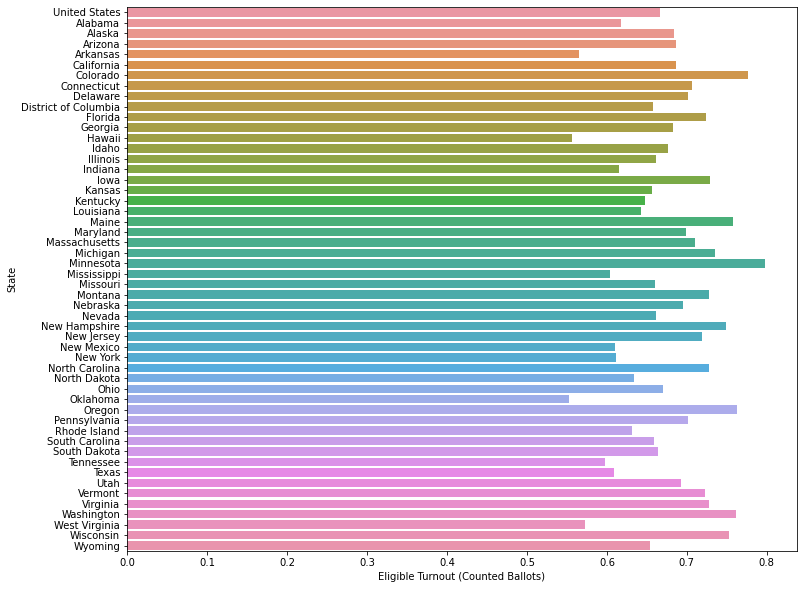

In [11]:
fig, ax = plt.subplots(figsize = (12,10))

labels = df['Eligible Turnout (Counted Ballots)'].index
values = df['Eligible Turnout (Counted Ballots)']

sns.barplot(x = values, y = labels)

In [12]:
def turnout_stats(dictionary):
    """Develop statistics for each dictionary: average percent voter turnout, 
    count of states, and std dev of percent"""
    summed = 0
    count = 0
    arr = []
    for k,v in dictionary.items():
        summed += df.loc[k, 'Eligible Turnout (Counted Ballots)']
        arr.append(df.loc[k, 'Eligible Turnout (Counted Ballots)'])
        count+=1
    return ((summed / count), count, np.std(arr))

In [13]:
mean_turnouts = []

stats_28_30 = turnout_stats(dict_28_30)
stats_20_27 = turnout_stats(dict_20_27)
stats_1_15 = turnout_stats(dict_1_15)
stats_0 = turnout_stats(dict_0)
stats_none = turnout_stats(dict_none)

mean_turnouts.append(stats_28_30[0]*100)
mean_turnouts.append(stats_20_27[0]*100)
mean_turnouts.append(stats_1_15[0]*100)
mean_turnouts.append(stats_0[0]*100)
mean_turnouts.append(stats_none[0]*100)

In [14]:
cat_labels = ['28-30 days', '20-27 days', '1-15 days', '0 days', 'No Registration']

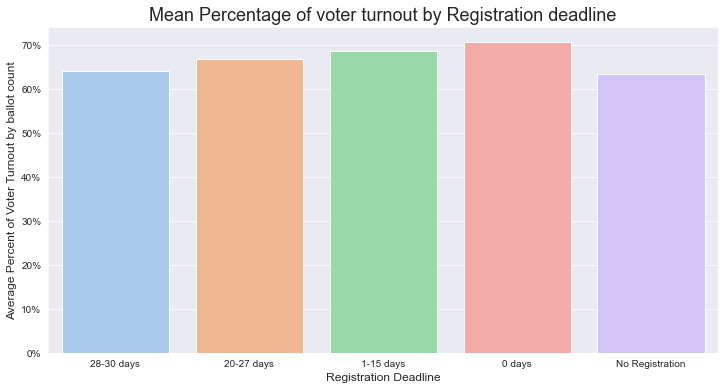

In [15]:
import matplotlib.ticker as mtick
sns.set_style("darkgrid")
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(x = cat_labels, y = mean_turnouts);
ax.set_title("Mean Percentage of voter turnout by Registration deadline", fontsize = 18)
ax.set_xlabel("Registration Deadline", fontsize = 12)
ax.set_ylabel("Average Percent of Voter Turnout by ballot count", fontsize = 12)

fmt = '%.0f%%' # Format you want the ticks, e.g. '40%'
yicks = mtick.FormatStrFormatter(fmt)
ax.yaxis.set_major_formatter(yicks)

In [16]:
import scipy.stats as stats

In [17]:
results = stats.ttest_ind_from_stats(stats_28_30[0], stats_28_30[2], stats_28_30[1], stats_0[0], stats_0[2], stats_0[1])

In [18]:
stats_28_30

(0.641779109621523, 15, 0.041236871183621404)

## Hypothesis Test Reults

$H_0:$The average voter turnout is the same for states with Election day registration and stats with registration deadlines 28 - 30 days prior to registration

$H_A:$ Average voter turnout in states with Day of Registration is higher than those with deadlines 28-30 days prior to election day

Testing with alpha = 0.05 for a one tail test at a 95% confidence level

In [19]:
print(f'p-value for one tail t test: {results.pvalue/2:.4f} < 0.05 thus we reject the null hypothesis')

p-value for one tail t test: 0.0003 < 0.05 thus we reject the null hypothesis


There is evidence to support the claim that the voter turnout in states with Day of Registration is higher than 
states which have registration deadlines 28-30 days prior to the election